### A shallow(2-Layer) Neural Network from scratch
**We will :**
- Build  the general architecture of a two layer Neural Network  learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.
<img src=./data/2-Layer_Neural_Network.png><img>

## 1 - Packages ##

import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
* [scikit-learn](http://scikit-learn.org/stable/) a library with Simple and efficient tools for data mining and data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
np.random.seed(42)

## 2 - Dataset ##

we will use the make_classification data from sklearn

Loading the data by with the  following code.

In [2]:
X,Y=datasets.make_classification(n_samples=1000000, n_features=100,
                                    n_informative=100,n_classes=2, n_redundant=0,
                                    random_state=42)


## - Data-split  ##

we will split the data with the following distribution 
- 99% -training set
- 1% -test set

we will use the sklearn train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01,
                                                    random_state=42)

For convenience, we reshape the data into  a numpy-array of shape (1, m). After this, our training (and test) dataset is a numpy-array where each column represents one training example. There should be m_train (respectively m_test) columns.

In [4]:
# we need to reshape our data to column vectors 
X_train=X_train.reshape(X_train.shape[0],-1).T
X_test=X_test.reshape(X_test.shape[0],-1).T
y_train=y_train.reshape(y_train.shape[0],-1).T
y_test=y_test.reshape(y_test.shape[0],-1).T


## 3 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

##### We will define the parameters of our Neural Network and initialize them 

In [5]:
def initialize_parameters(n_x,n_h,n_y):
    """
    This functions computes the initialization weights and bias for the hidden layer and output layer
    
    Arguments:
        n_x->number of features in the input X
        n_h-> number of units in the hidden layer
        n_y-> number of units in the output layer
    
    Returns:
        parameters->weights and biases for each layer
    """
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1),dtype=float)
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1),dtype=float)
    
    parameters={"W1": W1, "b1":b1,"W2":W2,"b2":b2}
    #Lets check that parameters have correct shapes
    assert parameters["W1"].shape==(n_h,n_x),"Error in parameters W1 shape"
    assert parameters["W2"].shape==(n_y,n_h),"Error in parameters W2 shape"
    assert parameters["b1"].shape==(n_h,1),"Error in parameters b1 shape"
    assert parameters["b2"].shape==(n_y,1),"Error in parameters b2 shape"
    
    return parameters

Lets do some checks to ensure we initiliazed the parameters correctly

In [6]:
parameters=initialize_parameters(X_train.shape[0],5,y_train.shape[0])
print(parameters["W1"].shape,parameters["W2"].shape,parameters["b1"].shape,parameters["b2"].shape)
    

(5, 100) (1, 5) (5, 1) (1, 1)


#### We define the activations functions mainly Relu and sigmoid and tanh

####  <center>  Relu function </center> 
#    <center>               $\max(0,Z)$</center> 


In [7]:
def relu(Z):
    """
    This function computes the relu activation 
    
    Arguments:
        Z-> Weighteds inputs (Z=W.TA+b)
    Returns:
        A->relu activations of Z
    """
    A=np.maximum(0,Z)
    
    return A


####  <center>  Tanh function </center> 
#    <center>               $\frac{\mathrm{e}^{z}-\mathrm{e}^{-z}}{\mathrm{e}^{z}+\mathrm{e}^{-z}}$</center> 

In [8]:
def tanh(Z):
    """
    This function computes the tanh activation 
    
    Arguments:
        Z-> Weighted inputs (Z=W.TA+b)
    Returns:
        A->tanh activations of Z
    """
    
    A=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    
    return A
    

####  <center>  Sigmoid function </center> 
#    <center>               $\frac{1}{1-\mathrm{e}^{-z}}$</center> 

In [9]:
def sigmoid(Z):
    """
    This function computes the sigmoid activation 
    
    Arguments:
        Z-> Weighted inputs (Z=W.TA+b)
    Returns:
        A->sigmoid activations of Z
    """
    A= 1/(1+np.exp(-Z))
    
    return A
    

### forward propagation

**forward propagation:** Implementing forward propagation 

** for layer hidden layer **
- We get X
- We compute $A1 = \sigma(W1^T X + b1) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$

** for output layer **
- We get layer 1 activations
- we compute $A2=\sigma(W2^T + b2)=(a^{(0)}, a^{(1)}, ..., a^{(n_h-1)}, a^{(n_h)})$


In [10]:
def forward_propagate(parameters,X,activation="relu"):
    """
    This function computes the forward propagation
    
    Arguments:
        parameters-> weights and biases for hidden layer
        activation-> the activation to use 
    """
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    #compute Z1
    Z1=np.dot(W1 ,X )+ b1
        
    if activation=="relu":
        A1=relu(Z1)
    elif activation=="sigmoid":
        A1=sigmoid(Z1)
    elif activation=="tanh":
        A1=tanh(Z1)
        
    Z2=np.dot(W2,A1)+b2
    #activation for the final layer is a sigmoid since we are trying to estimate the predictions where it's either 1 or 0
    A2=sigmoid(Z2)
    
    #we need to keep A2 and A1 for backpropagation
    cache={"A2":A2,"A1":A1,"Z1":Z1,"Z2":Z2 }
    
    return A2,cache
        
        
    
    
    

### Now we define the cost function 

In [11]:
def compute_cost(A,Y):
    """
    This function computes the cost of the Neural Network    
    
    Arguments:
        A-> Activations from the forward propagation
        Y-> The correct labels 
    Returns:
        cost-> logistic regression cost
    """
    m=Y.shape[1]
    cost=-(1/m)*np.sum(Y*np.log(A)+((1-Y)*np.log(1-A)))
    
    return cost

#### Derivatives of the activation functions

In [12]:
def relu_derivative(A):
    """
    This function computes the derivative of the relu function Max(0,Z)->drelu=Max(0,1)
    drelu->returns 0 for all values below and including o and 1 for all other values
    Arguments:
        A->Activations
    Returns:
        Ad->relu derivative of A
    """
    
    Ad=np.choose(A>0,[0,1])
    return Ad

In [13]:
def sigmoid_derivative(A):
    """
    This function computes the derivative of the sigmoid function
    the derivate evaluates to a(1-a) where a is the sigmoid function
    Arguments:
        A->Activations
    Returns:
        Ad->relu derivative of A
    """
    Ad=sigmoid(A)*(1-sigmoid(A))
    return Ad
    

In [14]:
def tanh_derivative(A):
    """
    This function computes the derivative of the tanh function
    the derivate evaluates to (1-a*a) where a is the tanh function
    Arguments:
        A->Activations
    Returns:
        Ad->tanh derivative of A
    """
    Ad=(1-tanh(A)*tanh(A))
    return Ad
    
    

#### Backpropagation for the 2-layer neural network. 
- We compute the derivatives dw1,dw2,db1 and db2
- These derivatives will be used to update the parameters W1,W2,b1 and b2

In [15]:
def backpropagation(cache,Y,X,parameters):
    """
    This function computes the gradients by backpropagation 
    Arguments:
        cache-> stored values of activations
        parameters->stored parameters
        Y->true labels
        X->inputs features
    Returns:
        grads-> a dictionary containing the gradients of the parameters W1,W2,b1,and b2
    
    """
    m=X.shape[1]
    
    A2=cache["A2"]
    A1=cache["A1"]
    Z1=cache["Z1"]
    Z2=cache["Z2"]
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    
    dZ2=A2-Y
    dW2=1/m* np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*relu_derivative(Z1)
    dW1=1/m*np.dot(dZ1,X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={"dW1":dW1,"dW2":dW2,"db1":db1,"db2":db2}
    
    return grads
    
    

#### predictions for the network
- We compute the predictions by using the updated parameters and running a forward propation step 
- We then convert all values below 0.5 to 0 and all above 0.5 to 1

In [16]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagate(parameters,X,activation="relu")
    predictions = np.choose(A2<0.5,[1,0])
   
    
    return predictions

### The 2 layer Neural Network model 
- We combine all the functions above into a neural network model

In [17]:
def model(X,Y,n_h,num_iterations,learning_rate):
    """
    This function combines all the above functions to create the 2 layer Neural Network
    
    Arguments:
        X-> inputs X
        Y->true labels
        num_iterations-> number of iterations
        learning_rate-> the model's learning rate
        n_h-> number of hidden units in the hidden layer
    Returns:
        parameters-> a dictionary with the updated parameters
    
    """
    np.seterr(all='raise') # raise any numpy errors
    costs=[]# a list of the costs over iterations
    parameters=initialize_parameters(X.shape[0],n_h,Y.shape[0])
    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]
    for i in range(num_iterations):
        A2,cache=forward_propagate(parameters,X,activation="relu")
        cost=compute_cost(A2,Y)
        costs.append(cost)
        grads=backpropagation(parameters=parameters,cache=cache,X=X,Y=Y)
        parameters["W1"]=parameters["W1"]-learning_rate*grads["dW1"]
        parameters["W2"]=parameters["W2"]-learning_rate*grads["dW2"]
        parameters["b1"]=parameters["b1"]-learning_rate*grads["db1"]
        parameters["b2"]=parameters["b2"]-learning_rate*grads["db2"]
        if i%100==0:
            preds=predict(parameters,X_train)
            print("cost on iteration {} is {}".format(i,cost))
            print("train accuracy on iteration {} is {} %".format(i,(100 - np.mean(np.abs(preds - y_train)) * 100)))
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('iterations')
    plt.title("Cost vs number of iterations")
    plt.grid(True)
    return parameters
        
        

### We now run the model with 
- 20 hidden units in the hidden layer 
- 402 iterations 
- learning rate of 0.1

cost on iteration 0 is 0.6927748868052204
train accuracy on iteration 0 is 55.385252525252525 %
cost on iteration 100 is 0.18685378916955542
train accuracy on iteration 100 is 93.88323232323232 %
cost on iteration 200 is 0.10758448042536403
train accuracy on iteration 200 is 97.18070707070707 %
cost on iteration 300 is 0.0831305110071814
train accuracy on iteration 300 is 98.09646464646465 %
cost on iteration 400 is 0.07222192506564194
train accuracy on iteration 400 is 98.48838383838384 %


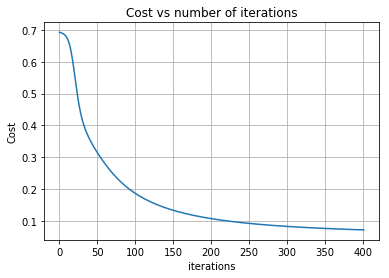

In [18]:
params=model(X_train,y_train,20,402,0.1)

####  Predictions on the test set

In [19]:
preds=predict(params,X_test)
print("test accuracy: {} %".format(100 - np.mean(np.abs(preds - y_test)) * 100))

test accuracy: 98.29 %


 ##  Tensorflow implementation

In [20]:
import tensorflow as tf

#### Initialize placeholders for the inputs X and Y

In [21]:
def initialize_placeholders(n_x,n_y):
    """
    This function  creates X and Y placeholders
    
    Arguments:
        n_x-> number of features (dimension)
        n_y -> dimension of output (row)
    Returns:
        X-> placeholder for X
        Y-> placeholder for Y
    """
    X= tf.placeholder(shape=(n_x,None),dtype=tf.float32,name="X")
    Y=tf.placeholder(shape=(n_y,None),dtype=tf.float32,name="Y")
    
    return X,Y

### initialize variables W1,W2,b1 and b2

In [22]:
def initialize_variables(n_x,n_h,n_y):
    """
    This function initializes variables W1,W2,b1 and b2
    Arguments:
        n_x-> number of features
        n_h-> units in hidden layer,
        n_y->units in output layer
    Returns:
        parameters-> a dictionary containing the parameters W1,W2,b1 and b2
    """
    W1=tf.get_variable(shape=(n_h,n_x),dtype=tf.float32,name="W1",initializer=tf.contrib.layers.xavier_initializer())
    
    b1=tf.get_variable(shape=(n_h,1),dtype=tf.float32,name="b1",initializer=tf.zeros_initializer(dtype=tf.float32))
    
    W2=tf.get_variable(shape=(n_y,n_h),dtype=tf.float32,name="W2",initializer=tf.contrib.layers.xavier_initializer())
    
    b2=tf.get_variable(shape=(n_y,1),dtype=tf.float32,name="b2",initializer=tf.zeros_initializer(dtype=tf.float32))
    
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    
    return parameters
    

### define the cost function

In [23]:
def compute_cost(A2,Y):
    """
    This function computes the cost of the Neural Network    
    
    Arguments:
        A-> Activations from the forward propagation(logits)
        Y-> The correct labels 
    Returns:
        cost-> logistic regression cost
    
    """
    m=Y.shape[1]
    cost =tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=A2,labels=Y))
    return cost

### We now define the forward propagation

In [24]:
def propagate(X,Y,parameters,activation="relu"):
    """
    This function computes the forward propagation for the network
    Arguments:
        X->input features X
        Y-> labels Y
        activation-> type of activation
    Returns:
        Z2-> weighted layer two values
    
    """
    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]
    
    Z1=tf.add(tf.matmul(W1,X), b1)
    if activation=="relu":
        A1=tf.nn.relu(Z1)
    elif activation=="tanh":
        A1=tf.nn.tanh(Z1)
    elif activation=="sigmoid":
        A1=tf.nn.sigmoid(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    
    return Z2
    
    

### We define the predict function which returns the sigmoid activations of the output layer

In [25]:
def predict(Z2):
    """
    This function computes the predictions 
    Arguments:
        Z2->weighted outputs for layer 2
    Returns:
        A2-> activations for output layer
    """
    
    A2=tf.nn.sigmoid(Z2)
    
    return A2
    

### To train on minibatch gradient descent we create a function to generate minibatches

In [13]:
def minibatch(X,Y,batch_size=64,seed=0):
    """
    This function creates minibatches given X and Y
    Arguments:
        X-> features
        Y-> labels
        batch_size-> size of batch to use
        seed-> numpy seed to generate 
    Returns:
        minibatches-> a list of minibatches generated
    
    """
    
    np.random.seed(seed)
    m=X_train.shape[1]
    number_of_batches=m//batch_size
    permutation = list(np.random.permutation(m))
    shuffled_X=X[:,permutation]
    shuffled_Y=Y[:,permutation].reshape(1,m)
    minibatches=[]
    for k in range(number_of_batches):
        mini_batch_X=shuffled_X[:,k*batch_size:(k+1)*batch_size]
        mini_batch_y=shuffled_Y[:,k*batch_size:(k+1)*batch_size]
        minibatch=(mini_batch_X,mini_batch_y)
        minibatches.append(minibatch)
    if m%batch_size!=0:
        last_batch_X=shuffled_X[:,number_of_batches*batch_size:m]
        last_batch_y=shuffled_Y[:,number_of_batches*batch_size:m]
        last_mini_batch=(last_batch_X,last_batch_y)
        minibatches.append(last_mini_batch)
    return minibatches
        
    
    
    

#### We define the model function to create the tensorflow 2 layer neural network

In [15]:
def model(X_train,y_train,X_test,y_test,num_iterations,hidden_units,learning_rate):
    """
    This function creates the tensorflow 2 layer neural network
    
    Arguments:
        X_train-> training inputs
        y_train-> training labels
        num_iterations-> number of iterations to compute gradient descent
        hidden_units->number of hidden units in the hidden layer
        learning_rate-> the learning rate for the gradient descent
    """
    tf.reset_default_graph() #reset the graph
    logs_path = "./tb2/" #tensorboard log directory
    
    # initialize the placeholders
    X,Y=initialize_placeholders(X_train.shape[0],y_train.shape[0])
    # initialize parameters
    parameters=initialize_variables(X_train.shape[0],hidden_units,y_train.shape[0])
    # compute forward propagation i.e the last activation is avoided since the cost function computes the sigmoid
    Z2=propagate(X,Y,parameters,"relu")
    #compute the loss function
    cost= compute_cost(Z2,Y)
    # define the optimizer
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    #define the predictions
    preds=predict(Z2)
    # define the Loss for ploting in the tensorboard view
    cost_summary= tf.summary.scalar("Loss", cost)
    summary_op = tf.summary.merge_all()

    init=tf.global_variables_initializer()
    # create session 
    with tf.Session() as sess:
        #initialize variables
        sess.run(init)
        # Tensorboard writer 
        writer = tf.summary.FileWriter(logs_path,graph=tf.get_default_graph())
        
        #seed for generating minibatches
        seed=10
        
        for i in range(num_iterations):
            seed=seed+1
            # evaluate cost and cost_summary 
            minibatches=minibatch(X_train,y_train,batch_size=64,seed=seed)
            for mini_batch in minibatches:
                (minibatch_X,minibatch_Y)= mini_batch
                summary,_,costs=sess.run([cost_summary,optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
            
                writer.add_summary(summary,i)
            if i%10==0:
                #evaluate train  and test predictions
                train_preds=np.choose(preds.eval(feed_dict={X:X_train})<0.5,[1,0])
                train_correct_prediction = tf.equal(train_preds, y_train)
                train_accuracy = tf.reduce_mean(tf.cast(train_correct_prediction, "float"))
                test_preds=np.choose(preds.eval(feed_dict={X:X_test})<0.5,[1,0])
                test_correct_prediction = tf.equal(test_preds, y_test)
                test_accuracy = tf.reduce_mean(tf.cast(test_correct_prediction, "float"))
                print("Cost:{}".format(costs))
                print("Training accuracy after {} epochs is {}".format(i,train_accuracy.eval()))
                print("Test accuracy after {} epochs is {}".format(i,test_accuracy.eval()))



#### We now create the model 
- Our computation graph is as follows 
- We use 11 epochs


<img src="./data/graph.png"><img>

In [16]:
model(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,num_iterations=11,hidden_units=100,learning_rate=0.1)

Cost:0.007514956872910261
Training accuracy after 0 epochs is 0.9947586059570312
Test accuracy after 0 epochs is 0.9948999881744385
Cost:0.007274497766047716
Training accuracy after 10 epochs is 0.9947707056999207
Test accuracy after 10 epochs is 0.9950000047683716
